In [1]:
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import time
import numpy as np

In [2]:
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

/usr/local/bin/chromedriver


In [5]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)
#UnboundLocalError: local variable 'e' referenced before assignment

In [2]:
def scrape_info(url):
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    browser = Browser('chrome', **executable_path, headless=False)
    browser.visit(url)
    time.sleep(2)
    html = browser.html
    soup =  BeautifulSoup(html,"html.parser")
    browser.quit()
    return soup

In [3]:
url = 'https://www.iqair.com/world-air-quality'

In [4]:
test_soup = scrape_info(url)
print(test_soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5.0" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   World Live Air Quality Map | AirVisual
  </title>
  <meta content="Compare real-time worldwide air quality levels with AirVisual's interactive air quality and pollution map. Learn from PM2.5 trends and our ranking of most polluted cities in the world." name="description"/>
  <base href="/"/>
  <meta content="app-id=1048912974" name="apple-itunes-app"/>
  <link href="assets/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="assets/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="assets/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="assets/favicons/site.webmanifest" rel="manifest"/>
  <link color="#d9272e" href="assets/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
  

In [5]:
country_url = []
tests = test_soup.find_all('div',class_ = 'name')
for test in tests:
    wocao = test.find('a')['href']
    country_url.append(f'https://www.iqair.com{wocao}')

In [11]:
print(type(country_url))

<class 'list'>


In [9]:
# country_url= ['https://www.iqair.com/south-africa/gauteng/johannesburg',
#     'https://www.iqair.com/china/guangdong/shenzhen',
#     'https://www.iqair.com/south-korea/seoul',
#     'https://www.iqair.com/iran/tehran',
#     'https://www.iqair.com/china/zhejiang/hangzhou',
#     'https://www.iqair.com/indonesia/jakarta',
#     'https://www.iqair.com/pakistan/sindh/karachi',
#     'https://www.iqair.com/south-korea/gyeonggi-do/incheon',
#     'https://www.iqair.com/kuwait/al-asimah/kuwait-city',
#     'https://www.iqair.com/india/delhi']

In [13]:
tables_cao = []

for x in country_url:
    table_soup = scrape_info(x)
    table_country = table_soup.find('table',class_ = 'aqi-overview-detail__main-pollution-table').find_all('td')
    tables_cao.append(table_country)
    # maybe weather
    
    
    

In [14]:
tables_cao

[[<td _ngcontent-airvisual-web-c35="">Unhealthy for Sensitive Groups</td>,
  <td _ngcontent-airvisual-web-c35="">149 <span _ngcontent-airvisual-web-c35="">US AQI</span></td>,
  <td _ngcontent-airvisual-web-c35="">PM2.5</td>],
 [<td _ngcontent-airvisual-web-c35="">Good</td>,
  <td _ngcontent-airvisual-web-c35="">19 <span _ngcontent-airvisual-web-c35="">US AQI</span></td>,
  <td _ngcontent-airvisual-web-c35="">PM2.5</td>],
 [<td _ngcontent-airvisual-web-c35="">Unhealthy for Sensitive Groups</td>,
  <td _ngcontent-airvisual-web-c35="">118 <span _ngcontent-airvisual-web-c35="">US AQI</span></td>,
  <td _ngcontent-airvisual-web-c35="">PM2.5</td>],
 [<td _ngcontent-airvisual-web-c35="">Unhealthy for Sensitive Groups</td>,
  <td _ngcontent-airvisual-web-c35="">107 <span _ngcontent-airvisual-web-c35="">US AQI</span></td>,
  <td _ngcontent-airvisual-web-c35="">PM2.5</td>],
 [<td _ngcontent-airvisual-web-c35="">Unhealthy for Sensitive Groups</td>,
  <td _ngcontent-airvisual-web-c35="">145 <span 

In [15]:
y=[]
for s in tables_cao:
    z=[]
    y.append(z)
    for w in s:
        x = w.text
        z.append(x)

In [16]:
y

[['Unhealthy for Sensitive Groups', '149 US AQI', 'PM2.5'],
 ['Good', '19 US AQI', 'PM2.5'],
 ['Unhealthy for Sensitive Groups', '118 US AQI', 'PM2.5'],
 ['Unhealthy for Sensitive Groups', '107 US AQI', 'PM2.5'],
 ['Unhealthy for Sensitive Groups', '145 US AQI', 'o3'],
 ['Unhealthy for Sensitive Groups', '108 US AQI', 'PM2.5'],
 ['Unhealthy for Sensitive Groups', '105 US AQI', 'PM2.5'],
 ['Moderate', '95 US AQI', 'PM2.5'],
 ['Moderate', '98 US AQI', 'PM2.5'],
 ['Moderate', '88 US AQI', 'PM2.5']]

In [17]:
first = np.array(y)
first

array([['Unhealthy for Sensitive Groups', '149 US AQI', 'PM2.5'],
       ['Good', '19 US AQI', 'PM2.5'],
       ['Unhealthy for Sensitive Groups', '118 US AQI', 'PM2.5'],
       ['Unhealthy for Sensitive Groups', '107 US AQI', 'PM2.5'],
       ['Unhealthy for Sensitive Groups', '145 US AQI', 'o3'],
       ['Unhealthy for Sensitive Groups', '108 US AQI', 'PM2.5'],
       ['Unhealthy for Sensitive Groups', '105 US AQI', 'PM2.5'],
       ['Moderate', '95 US AQI', 'PM2.5'],
       ['Moderate', '98 US AQI', 'PM2.5'],
       ['Moderate', '88 US AQI', 'PM2.5']], dtype='<U30')

In [21]:
tables_name = []

for x in country_url:
    table_soup = scrape_info(x)
    y = table_soup.find('h1').text
    tables_name.append([y])

In [24]:
second = np.array(tables_name)
second

array([['Air quality in Shanghai'],
       ['Air quality in Shenzhen'],
       ['Air quality in Ho Chi Minh City'],
       ['Air quality in Shenyang'],
       ['Air quality in Tehran'],
       ['Air quality in Jakarta'],
       ['Air quality in Lahore'],
       ['Air quality in Delhi'],
       ['Air quality in Santiago'],
       ['Air quality in Karachi']], dtype='<U31')

In [23]:
final = np.concatenate((second, first), axis=1)
final

array([['Air quality in Johannesburg', 'Moderate', '63 US AQI', 'PM2.5'],
       ['Air quality in Shenzhen', 'Unhealthy for Sensitive Groups',
        '129 US AQI', 'PM2.5'],
       ['Air quality in Seoul', 'Unhealthy for Sensitive Groups',
        '118 US AQI', 'PM2.5'],
       ['Air quality in Tehran', 'Moderate', '77 US AQI', 'PM2.5'],
       ['Air quality in Hangzhou', 'Moderate', '70 US AQI', 'PM2.5'],
       ['Air quality in Jakarta', 'Unhealthy', '159 US AQI', 'PM2.5'],
       ['Air quality in Karachi', 'Moderate', '81 US AQI', 'PM2.5'],
       ['Air quality in Incheon', 'Moderate', '90 US AQI', 'PM2.5'],
       ['Air quality in Kuwait City', 'Unhealthy for Sensitive Groups',
        '104 US AQI', 'PM2.5'],
       ['Air quality in Delhi', 'Moderate', '84 US AQI', 'PM2.5']],
      dtype='<U30')

In [30]:
l=[]
for x in country_url:
    l.append([x])
    

In [31]:
l

[['https://www.iqair.com/china/shanghai'],
 ['https://www.iqair.com/china/guangdong/shenzhen'],
 ['https://www.iqair.com/vietnam/ho-chi-minh-city'],
 ['https://www.iqair.com/china/liaoning/shenyang'],
 ['https://www.iqair.com/iran/tehran'],
 ['https://www.iqair.com/indonesia/jakarta'],
 ['https://www.iqair.com/pakistan/punjab/lahore'],
 ['https://www.iqair.com/india/delhi'],
 ['https://www.iqair.com/chile/santiago-metropolitan/santiago'],
 ['https://www.iqair.com/pakistan/sindh/karachi']]

In [34]:
third = np.array(l)
third

array([['https://www.iqair.com/china/shanghai'],
       ['https://www.iqair.com/china/guangdong/shenzhen'],
       ['https://www.iqair.com/vietnam/ho-chi-minh-city'],
       ['https://www.iqair.com/china/liaoning/shenyang'],
       ['https://www.iqair.com/iran/tehran'],
       ['https://www.iqair.com/indonesia/jakarta'],
       ['https://www.iqair.com/pakistan/punjab/lahore'],
       ['https://www.iqair.com/india/delhi'],
       ['https://www.iqair.com/chile/santiago-metropolitan/santiago'],
       ['https://www.iqair.com/pakistan/sindh/karachi']], dtype='<U58')

In [39]:
np.concatenate((second, third, first), axis=1).tolist()

[['Air quality in Shanghai',
  'https://www.iqair.com/china/shanghai',
  'Unhealthy for Sensitive Groups',
  '149 US AQI',
  'PM2.5'],
 ['Air quality in Shenzhen',
  'https://www.iqair.com/china/guangdong/shenzhen',
  'Good',
  '19 US AQI',
  'PM2.5'],
 ['Air quality in Ho Chi Minh City',
  'https://www.iqair.com/vietnam/ho-chi-minh-city',
  'Unhealthy for Sensitive Groups',
  '118 US AQI',
  'PM2.5'],
 ['Air quality in Shenyang',
  'https://www.iqair.com/china/liaoning/shenyang',
  'Unhealthy for Sensitive Groups',
  '107 US AQI',
  'PM2.5'],
 ['Air quality in Tehran',
  'https://www.iqair.com/iran/tehran',
  'Unhealthy for Sensitive Groups',
  '145 US AQI',
  'o3'],
 ['Air quality in Jakarta',
  'https://www.iqair.com/indonesia/jakarta',
  'Unhealthy for Sensitive Groups',
  '108 US AQI',
  'PM2.5'],
 ['Air quality in Lahore',
  'https://www.iqair.com/pakistan/punjab/lahore',
  'Unhealthy for Sensitive Groups',
  '105 US AQI',
  'PM2.5'],
 ['Air quality in Delhi',
  'https://www.iqai

In [34]:
url='https://www.who.int/news-room/q-a-detail/q-a-on-climate-change-and-covid-19#'

<html class="k-webkit k-webkit83" lang="en">
 <head>
  <script async="" src="https://www.google-analytics.com/gtm/js?id=GTM-P9P822R&amp;t=gtm3&amp;cid=800517756.1592354971" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5ee9689ac13a7e8b&amp;bkl=0&amp;bl=1&amp;pdt=383&amp;sid=5ee9689ac13a7e8b&amp;pub=ra-5803f964fe6c9599&amp;rev=v8.28.6-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.who.int&amp;fp=news-room%2Fq-a-detail%2Fq-a-on-climate-change-and-covid-19&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1592354970924&amp;jsl=1&amp;uvs=5ee9689ad7fdea9a000&amp;skipb=1&amp;callback=addthis.cbs.jsonp__083036696343661510" type="text/javascript">
  </script>
  <script src="https://v1.addthisedge.com/live/boost/ra-5803f964fe6c9599/
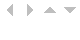

In [35]:
image_soup = scrape_info(url)
print(image_soup.prettify())

In [48]:
image_soup.find_all('div',class_ = 'sf-accordion__content')[1].find_all('p')[1].text

'No. There is currently no conclusive evidence that either weather (short term variations in meteorological conditions) or climate (long-term averages) have a strong influence on transmission. The SARS-CoV-2 virus which causes COVID-19 disease has been transmitted in all regions of the world, from cold and dry, to hot and humid climates.'

In [50]:
image_soup.find_all('div',class_ = 'sf-accordion__content')[3].find_all('p')[2].text

'Efforts to control COVID-19 transmission have reduced economic activity and led to temporary improvements in air quality in some areas. In contrast, as carbon dioxide and other greenhouse gases that drive climate change persist for a long time in the atmosphere, temporary emissions reductions only have a limited effect on atmospheric concentrations. Carbon dioxide levels at observing stations around the world in the first months of 2020 have been higher than in 2019.'

In [54]:
ufo_url='http://127.0.0.1:5500/flask/templates/ufo.html'

In [55]:
ufo_soup = scrape_info(ufo_url)
print(ufo_soup.prettify())

<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   UFO Finder
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://maxcdn.bootstrapcdn.com/bootswatch/3.3.7/superhero/bootstrap.min.css" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Ubuntu" rel="stylesheet"/>
  <link href="static/css/style.css" rel="stylesheet"/>
  <script src="https://d3js.org/d3.v5.min.js">
  </script>
  <script src="https://cdnjs.cloudflare.com/ajax/libs/mathjs/5.0.0/math.min.js">
  </script>
 </head>
 <body>
  <div class="wrapper">
   <nav class="navbar navbar-default">
    <div class="container-fluid">
     <div class="navbar-header">
      <a class="navbar-brand" href="index.html">
       UFO Sightings
       <img class="nav-ufo" src="static/images/ufo.svg"/>
      </a>
     </div>
    </div>
   </nav>
   <div class="hero text-center">
    <h1>
     UFO Sightings
    </h1>
    <p>
     The Truth is Out There
    </p>
   </div>
   <div

In [59]:
ufo_table = ufo_soup.find('tbody')

<class 'bs4.element.Tag'>


In [47]:
p=[]
for q in tables_name:
    for j in y:
        uu = q + j
#         if uu not in p:
#         p.append(uu)
uu

['Air quality in Delhi',
 'Unhealthy for Sensitive Groups',
 '117 US AQI',
 'PM2.5']

In [ ]:
country_url= ['https://www.iqair.com/south-africa/gauteng/johannesburg',
    'https://www.iqair.com/china/guangdong/shenzhen',
    'https://www.iqair.com/south-korea/seoul',
    'https://www.iqair.com/iran/tehran',
    'https://www.iqair.com/china/zhejiang/hangzhou',
    'https://www.iqair.com/indonesia/jakarta',
    'https://www.iqair.com/pakistan/sindh/karachi',
    'https://www.iqair.com/south-korea/gyeonggi-do/incheon',
    'https://www.iqair.com/kuwait/al-asimah/kuwait-city',
    'https://www.iqair.com/india/delhi']

In [ ]:
# Iterate through all pages

t=[]
c=[]
for x in range(3):      
# HTML object
    html = browser.html
# Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
# Retrieve all elements that contain book information
    results = soup.find_all('div', class_='list_text')  

# Iterate through each book
    for result in results:
        # Use Beautiful Soup's find() method to navigate and retrieve attributes
        title = result.find('div',class_='content_title').text
        if title not in t: 
            t.append(title) 
            content = result.find('div',class_='article_teaser_body').text
            c.append(content)
        #if title not in l: 
        #a.append(title)

        #b.append(content)
            print(f'page:{x}-----------')
            print(f'news_title: {title}')
            print(f'news_p:{content}')       

        # Click the 'Next' button on each page
    try:
        time.sleep(2)
        #browser.find_link_by_text('More').first.click() work
        #browser.click_link_by_partial_text('More') does not work
        browser.click_link_by_text('More')

    except:
        print("Scraping Complete")

browser.quit()
    


In [ ]:
news_title=t[0]

In [ ]:
news_p=c[0]


In [ ]:
print(f'news_title = {news_title}')
print(f'news_p = {news_p}')

In [ ]:
title = soup.find('div',class_='list_text').find('a').text

title

In [ ]:
content = soup.find('div',class_='article_teaser_body').text
content

In [ ]:
###JPL Mars Space Images - Featured Image

In [ ]:
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser = Browser("chrome", **executable_path, headless=False)

In [ ]:
url_img='https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url_img) 

In [ ]:
#find the first div.img which is the current img
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
img_url = soup.find('div',class_='img').find('img')['src']
img_url


In [ ]:
browser.quit()


In [ ]:
#image url
featured_image_url=f'https://www.jpl.nasa.gov{img_url}'
featured_image_url


In [ ]:
###mars_weather---TWITTER

In [4]:
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser=Browser("chrome", **executable_path, headless=False)

In [5]:
url_weather='https://twitter.com/marswxreport?lang=en'
#url_weather='https://twitter.com/marswxreport'
browser.visit(url_weather) 

In [6]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [7]:
mars_weather=soup.find('div',lang='en').find('span').text # class_='css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'
mars_weather


'InSight sol 551 (2020-06-14) low -92.3ºC (-134.1ºF) high -1.3ºC (29.7ºF)\nwinds from the WNW at 4.2 m/s (9.4 mph) gusting to 16.3 m/s (36.4 mph)\npressure at 7.40 hPa'

In [8]:
browser.quit()


In [9]:
### Mars Facts---tables

In [10]:
url_table='https://space-facts.com/mars/'
tables = pd.read_html(url_table)
tables
browser.quit()


In [11]:
df = tables[0]
df

,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [12]:
df.columns=['parameter','value']
df

,parameter,value
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [13]:
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>parameter</th>\n      <th>value</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>First Record:</td>\n      <td>2nd millennium BC

In [14]:
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>parameter</th>      <th>value</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Equatorial Diameter:</td>      <td>6,792 km</td>    </tr>    <tr>      <th>1</th>      <td>Polar Diameter:</td>      <td>6,752 km</td>    </tr>    <tr>      <th>2</th>      <td>Mass:</td>      <td>6.39 × 10^23 kg (0.11 Earths)</td>    </tr>    <tr>      <th>3</th>      <td>Moons:</td>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>4</th>      <td>Orbit Distance:</td>      <td>227,943,824 km (1.38 AU)</td>    </tr>    <tr>      <th>5</th>      <td>Orbit Period:</td>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>6</th>      <td>Surface Temperature:</td>      <td>-87 to -5 °C</td>    </tr>    <tr>      <th>7</th>      <td>First Record:</td>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>8</th>      <td>Recorded By:</td>      <td>Egyptian astronomer

In [15]:
df.to_html('table.html')

In [16]:
!open table.html

In [17]:
#Mars Hemispheres

In [18]:
executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
browser=Browser("chrome", **executable_path, headless=False)

In [19]:
url_mars='https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url_mars) 

In [20]:
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
items=soup.find_all('div', class_='description')
items

[]

In [21]:
titles_list=[]
url_list = []
hemisphere_image_urls=[]

for item in items:
    title=item.h3.text
    titles_list.append(title)
    url=item.find('a')['href']
    url_list.append(url)
    z={'title':title,'img_url':f'https://astrogeology.usgs.gov{url}'}
    #z=dic(ztitle=title,img_url= url)
    #dic=dict(zip(title, url))
    hemisphere_image_urls.append(z) 
    

In [22]:
image_url=[]
for x in hemisphere_image_urls:
    browser.visit(x['img_url'])
    html = browser.html
    soup = BeautifulSoup(html, 'html.parser')
    x=soup.find('ul').find('a')['href']
    y={'title':title,'img_url':x}
    image_url.append(y)


In [23]:
browser.quit()

In [24]:
image_url

[]

In [26]:
def scrape_info(url):
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    browser = Browser('chrome', **executable_path, headless=False)
    browser.visit(url)
    time.sleep(2)
    html = browser.html
    soup =  BeautifulSoup(html,"html.parser")
    return soup
    

In [27]:
mars_data={}

In [28]:
url_table='https://space-facts.com/mars/'
table_soup = scrape_info(url_table)

In [29]:
table= table_soup.find('tbody')
str(table)

'<tbody><tr class="row-1 odd"><td class="column-1"><strong>Equatorial Diameter:</strong></td><td class="column-2">6,792 km<br/></td></tr><tr class="row-2 even"><td class="column-1"><strong>Polar Diameter:</strong></td><td class="column-2">6,752 km<br/></td></tr><tr class="row-3 odd"><td class="column-1"><strong>Mass:</strong></td><td class="column-2">6.39 × 10^23 kg<br/> (0.11 Earths)</td></tr><tr class="row-4 even"><td class="column-1"><strong>Moons:</strong></td><td class="column-2">2 (<a href="https://space-facts.com/moons/phobos/">Phobos</a> &amp; <a href="https://space-facts.com/moons/deimos/">Deimos</a>)</td></tr><tr class="row-5 odd"><td class="column-1"><strong>Orbit Distance:</strong></td><td class="column-2">227,943,824 km<br/> (1.38 AU)</td></tr><tr class="row-6 even"><td class="column-1"><strong>Orbit Period:</strong></td><td class="column-2">687 days (1.9 years)<br/></td></tr><tr class="row-7 odd"><td class="column-1"><strong>Surface Temperature: </strong></td><td class="c

In [30]:
table= table_soup.find('tbody').find_all()
table

[<tr class="row-1 odd"><td class="column-1"><strong>Equatorial Diameter:</strong></td><td class="column-2">6,792 km<br/></td></tr>,
 <td class="column-1"><strong>Equatorial Diameter:</strong></td>,
 <strong>Equatorial Diameter:</strong>,
 <td class="column-2">6,792 km<br/></td>,
 <br/>,
 <tr class="row-2 even"><td class="column-1"><strong>Polar Diameter:</strong></td><td class="column-2">6,752 km<br/></td></tr>,
 <td class="column-1"><strong>Polar Diameter:</strong></td>,
 <strong>Polar Diameter:</strong>,
 <td class="column-2">6,752 km<br/></td>,
 <br/>,
 <tr class="row-3 odd"><td class="column-1"><strong>Mass:</strong></td><td class="column-2">6.39 × 10^23 kg<br/> (0.11 Earths)</td></tr>,
 <td class="column-1"><strong>Mass:</strong></td>,
 <strong>Mass:</strong>,
 <td class="column-2">6.39 × 10^23 kg<br/> (0.11 Earths)</td>,
 <br/>,
 <tr class="row-4 even"><td class="column-1"><strong>Moons:</strong></td><td class="column-2">2 (<a href="https://space-facts.com/moons/phobos/">Phobos</

In [ ]:
mars_data['mars_facts'] = table

In [ ]:
mars_data